In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

# turn of data table rendering
pd.set_option('display.notebook_repr_html', False)
plt.style.use('ggplot')
pd.__version__

'1.2.4'

## Data
The data is a set of ten salaries, as used in the Udacity course 'Intro to Descriptive Statistics' lesson 4 on measures of variability.

In [114]:
data = pd.DataFrame({'salaries': 
                     [33219, 36254, 38801, 46335, 46840, 
                      47596, 55130, 56863, 78070, 88830]})
print(data.loc[7:1:-2],"\n")
print( data)

   salaries
7     56863
5     47596
3     46335
1     36254 

   salaries
0     33219
1     36254
2     38801
3     46335
4     46840
5     47596
6     55130
7     56863
8     78070
9     88830


<AxesSubplot:>

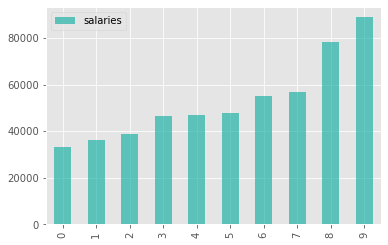

In [48]:
data.plot(kind='bar', color='#00A99D', alpha=.6)

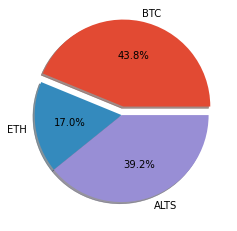

          0
BTC   43.8%
ETH   17.0%
ALTS  39.2%


In [112]:

BTC =  726000000/1656726463 
ETH =  281285000/1656726463 
ALTS = 1 -(btc + eth) 



crypto = np.array([btc,eth,alts]).round(3)*100 
labels = ["BTC", "ETH", "ALTS"]
myexplode = [0.1,0,0]

plt.pie(crypto, labels=labels, explode = myexplode, autopct='%1.1f%%', shadow=True)
plt.show()


df = pd.DataFrame(crypto, index=  ["BTC", "ETH", "ALTS"])
df[0] = df[0].apply(lambda x: str(x) + "%")
print(df)


## Calculate the Variance
The variance of a data set describes the average of the squared differences from the mean. In other words, it is a measure of how far each value in the data set is from the mean. The symbol for the variance of a population is $\sigma^2$ (sigma squared) and for a sample we use $s^2$. We calculate the variance by summing the squared difference from the mean for each value. For the population, we divide by the number of values $n$ in the data set.

$$population\ variance:\ \sigma^2=\frac{1}{n}\sum_{i=0}^n(x_i-\mu)^2$$

For the sample we divide the summed up values by the degrees of freedom $n-1$ (also called Bessel's correction). We use $\bar{x}$ (x bar) to symbolize our sample mean.

$$sample\ variance:\ s^2=\frac{1}{n-1}\sum_{i=0}^n(x_i-\bar{x})^2$$

In [139]:
# To calculate the population variance
n = len(data.salaries)

# first calculate the mean
mean = data.salaries.mean()

# Sum up the squared differences from the mean
squared_deviations = 0
for v in data.salaries:
    squared_deviations += (v - mean) ** 2

population_variance = squared_deviations / n
population_variance

291622740.36

In [161]:
n = len(data.salaries)


mean = data.salaries.mean()
x=0
for s in data.salaries:
   x += (s-mean)**2

var = x/n
var     

291622740.36

In [117]:
np.var(data).round(3)

salaries    2.916227e+08
dtype: float64

In [164]:
# To calculate the variance if we only have a sample
# First calculate the degrees of freedom (apply Bessel's correction)
dof = n - 1
sample_variance = squared_deviations / dof
sample_variance

324025267.0666667

In [165]:
# Of course we can use pandas to let NumPy do the job for us
# The ddof parameter stands for Delta Degrees of Freedom
population_variance = data.salaries.var(ddof=)
sample_variance = data.salaries.var() # ddof=1 by default in pandas

population_variance, sample_variance

(291622740.36, 324025267.06666666)

In [170]:
# Or call the NumPy var function ourselves
population_variance = np.var(data.salaries) # ddof=0 by default in NumPy
sample_variance = np.var(data.salaries, ddof=0)

population_variance, sample_variance

(291622740.36, 291622740.36)

## Calculate the Standard Deviation
The standard deviation is a widely used normalized measure of spread of a data set. Unlike the variance, the standard deviation is using the same scale as our values; dollars in this case. In a normal distribution, about 95% of the values are within two standard deviations of the mean. We use the Greek letter sigma $\sigma$ to symbolize the population standard deviation. 

$$population\ standard\ deviation:\ \sigma=\sqrt{\frac{1}{n}\sum_{i=0}^n(x_i-\mu)^2}\ \ =\ \ \sqrt{\sigma^2}$$

We use the lowercase letter $s$ if we indicate the sample standard deviation.

$$sample\ standard\ deviation:\ s=\sqrt{\frac{1}{n-1}\sum_{i=0}^n(x_i-\bar{x})^2}\ \ =\ \ \sqrt{s^2}$$

In [8]:
# To calculate the population standard deviation
# we first need to calculate the population variance again
n = len(data.salaries)

# first calculate the mean
mean = data.salaries.mean()

# Sum up the squared differences from the mean
squared_deviations = 0
for v in data.salaries:
    squared_deviations += (v - mean) ** 2

population_variance = squared_deviations / n

# Square the variance
population_standard_deviation = math.sqrt(population_variance)
population_standard_deviation

17076.965197598784

In [ ]:
np.std(da)

In [9]:
# To calculate the sample standard deviation
# First calculate the degrees of freedom (apply Bessel's correction)
dof = n - 1
sample_variance = squared_deviations / dof

# Square the variance
sample_standard_deviation = math.sqrt(sample_variance)
sample_standard_deviation

18000.70184927984

In [10]:
# Now let's use pandas to let NumPy do the job for us
population_standard_deviation = data.salaries.std(ddof=0)
sample_standard_deviation = data.salaries.std()

population_standard_deviation, sample_standard_deviation

(17076.965197598784, 18000.70184927984)

In [11]:
# Or call the NumPy std function ourselves
population_standard_deviation = np.std(data.salaries)
sample_standard_deviation = np.std(data.salaries, ddof=1)

population_standard_deviation, sample_standard_deviation

(17076.965197598784, 18000.70184927984)